In [60]:
import pandas as pd
import numpy as np
import requests, zipfile
import io
import gzip
import simplejson

In [93]:
#links of all reviews
link_url_str =  '''https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_DVD_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Video_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Toys_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Tools_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Sports_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Software_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Shoes_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Pet_Products_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Outdoors_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Office_Products_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Musical_Instruments_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Music_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Electronics_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Mobile_Apps_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Major_Appliances_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Lawn_and_Garden_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Kitchen_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Jewelry_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Improvement_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_Entertainment_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Home_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Health_Personal_Care_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Grocery_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Furniture_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Electronics_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_02.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_01.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Books_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Baby_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Automotive_v1_00.tsv.gz
https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz
'''

In [44]:
urls = list()
urls = link_url_str.split('\n')
urls_trimmed = urls[1]
urls_trimmed

'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz'

In [86]:
#only reading in gift card reviews
gift_cards = pd.read_table('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz')
gift_cards.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


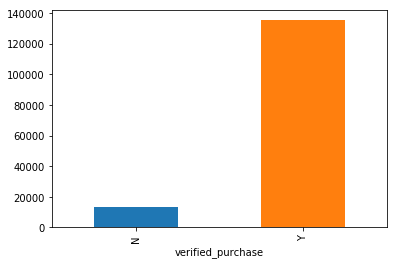

In [149]:
#insights
#Verified vs non verified purchases
gift_cards.groupby('verified_purchase')['product_title'].count()
verification_status = gift_cards.groupby('verified_purchase')['product_title']
verification_status.size().plot(kind='bar')

In [127]:
#create two sub datasets_verified and non verified
gc_ver = gift_cards[gift_cards['verified_purchase'] == 'Y']
gc_nver = gift_cards[gift_cards['verified_purchase'] == 'N']
gc_nver['star_rating'].mean()

4.578142999769603

In [128]:
#slightly higher rating for verified purchases
print(f'Verified avg: {gc_ver["star_rating"].mean()}', f'Unverified avg: {gc_nver["star_rating"].mean()}')

Verified avg: 4.746076916822506 Unverified avg: 4.578142999769603


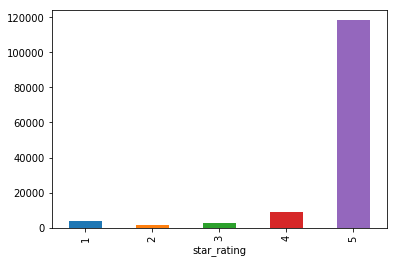

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
rating_ver = gc_ver.groupby('star_rating')
rating_ver.size().plot(kind='bar')


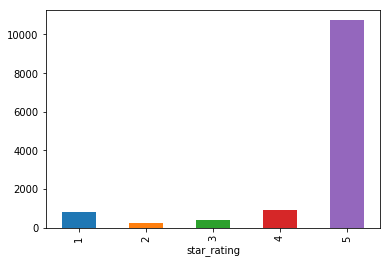

In [150]:
#greateter population of 1*
rating_nver = gc_nver.groupby('star_rating')
rating_nver.size().plot(kind='bar')

In [138]:
#avg length of review
calc_list = list()
calc_list2 = list()
for review in gc_ver['review_body']:
    calc_list.append(len(str(review)))
    
for review in gc_nver['review_body']:
    calc_list2.append(len(str(review)))
    
print(f'Avg len Vreview: {np.array(calc_list).mean()}', f' Avg len of UVreview: {np.array(calc_list2).mean()}')
    

Avg len Vreview: 119.4873714788342  Avg len of UVreview: 214.2929882497504


In [139]:
#break up into monthly datasets for insight

#

In [178]:
#see if there's any cooreleation between review length and star rating, in each group and whole
gc_ver['length'] = gc_ver['review_body'].apply(lambda x: len(str(x)))
gc_nver['length'] = gc_nver['review_body'].apply(lambda x: len(str(x)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


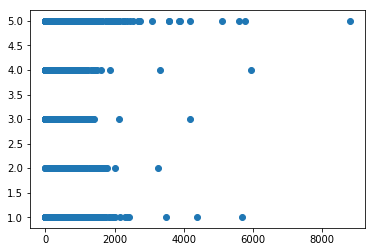

In [185]:
plt.scatter(gc_ver['length'], gc_ver['star_rating'])


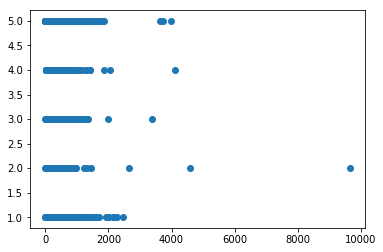

In [180]:
plt.scatter(gc_nver['length'], gc_nver['star_rating'])
#place the average len for each rating on the plot

In [81]:
gift_cards.describe()
gift_cards.head()
grouped_cards = gift_cards.groupby('product_title').count()
#grouped_cards.sort_values('product_id', ascending=False)
#desc[desc['marketplace']>1].count


In [64]:
# luggage = pd.read_csv('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [83]:

# r = requests.get('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Luggage_v1_00.tsv.gz')
# z = zipfile.ZipFile(io.StringIO(r.content))
# luggage = pandas.read_csv(z.read('amazon_reviews_us_Luggage_v1_00.tsv'))

In [186]:
# #create a list of review names
# review_names = list()
# df_dict = dict()
# for url in urls_trimmed:
#     name= url[66:-13]
#     review_names.append(name)
    
#     df=pd.read_csv(url)
#     review_names[name] = df

    

In [ ]:
for url in urls:

In [ ]:
#notes:
#pull in reviews from multiple datasets, seperate the combined dataset into non verified vs verified purchases

#do analysis on a monthly basis

#use review text to predict what the rating will be